# Non-Linear SVM Classification

🚀  **`The following approaches basically try to express the nonlinear relationship in a linear way!`**

## Adding polynomial features

An approach to non-linear datasets is to add more features, such as polynomial features.

<div>
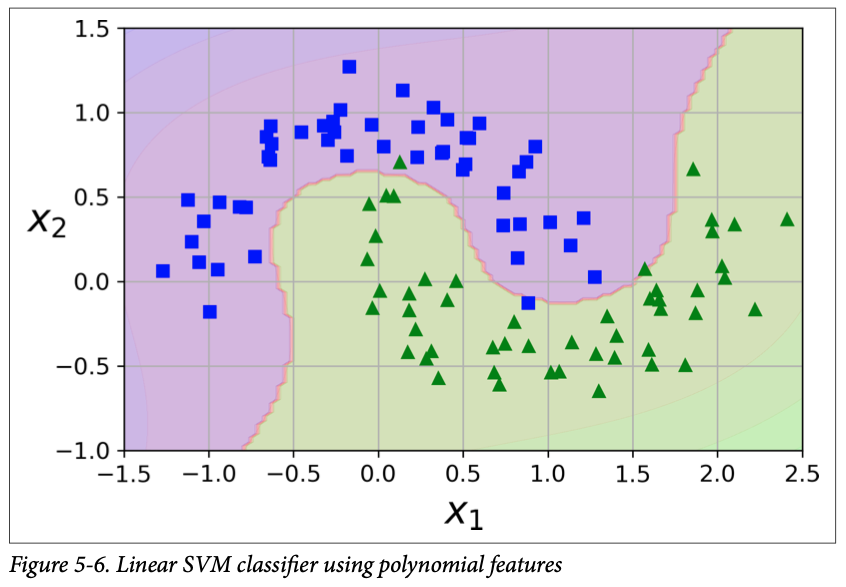
</div>

In [5]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.svm import LinearSVC

In [9]:
X, y = make_moons(n_samples=100, noise=0.15)

polynomial_svm_clf = Pipeline([
    ("poly_features", PolynomialFeatures(degree=3)), 
    ("scaler", StandardScaler()),
    ("svm_clf", LinearSVC(C=10, loss="hinge", max_iter=2000))
])

In [10]:
polynomial_svm_clf.fit(X, y)

Pipeline(memory=None,
     steps=[('poly_features', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', LinearSVC(C=10, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=2000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0))])

🔥 Low polynomial degree - Cannot deal with complex datasets 

🔥 High polynomial degree - It create a huge number of featues, making model slow

### Using Polynomial Kernel

When using SVMs, you can apply **`polynomial kernel`**. 
- It produces the same result as adding many `polynomial features` without actually having to add them.

<div>
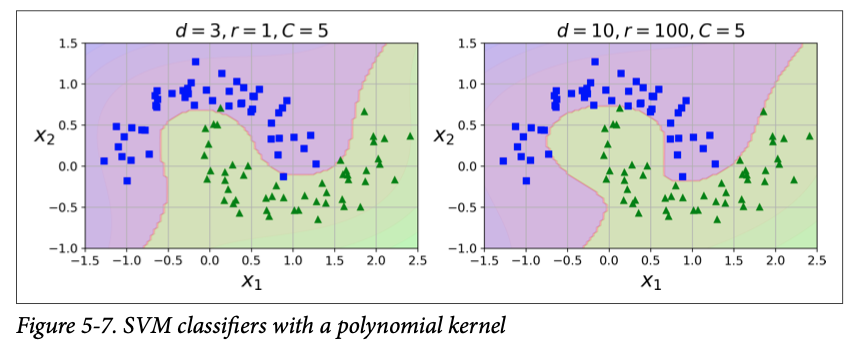
</div>

In [11]:
from sklearn.svm import SVC 

In [12]:
poly_kernel_svm_clf = Pipeline([
            ("scaler", StandardScaler()),
            ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))])

poly_kernel_svm_clf.fit(X, y)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', SVC(C=5, cache_size=200, class_weight=None, coef0=1,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))])

## Similarity Features

Another technique to tackle nonlinear problems is to add features computed using a similarity function that measures how much each instance resembles a particular landmark. For example, let’s take the one-dimensional dataset discussed earlier and add two landmarks to it at x1 = –2 and x1 = 1 (see the left plot in Figure 5-8).

It is a bell-shaped function varying from 0 (very far away from the landmark) to 1 (at the landmark). Now we are ready to compute the new features. For example, let’s look at the instance x1 = –1: it is located at a distance of 1 from the first landmark, and 2 from the second landmark. Therefore its new features are x2 = exp (–0.3 × 12) ≈ 0.74 and x3 = exp (–0.3 × 22) ≈ 0.30. The plot on the right of Figure 5-8 shows the trans‐ formed dataset (dropping the original features). As you can see, it is now linearly separable.

<div>
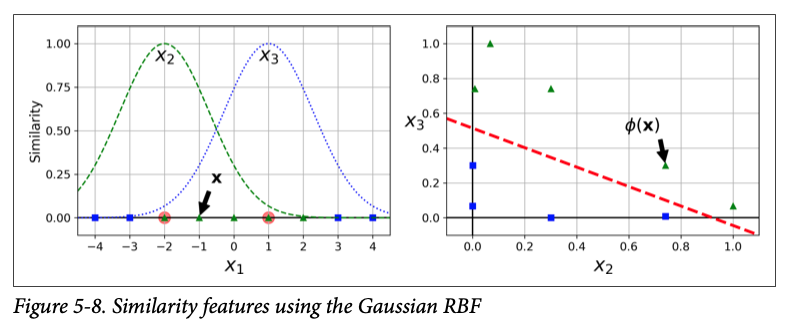
</div>

### Using Gaussian RBF kernel

When using SVMs, you can apply **`rbf kernel`**. 
- It produces the same result as adding many `similarity features` without actually having to add them.
- RBF - Radial Basis Function

<div>
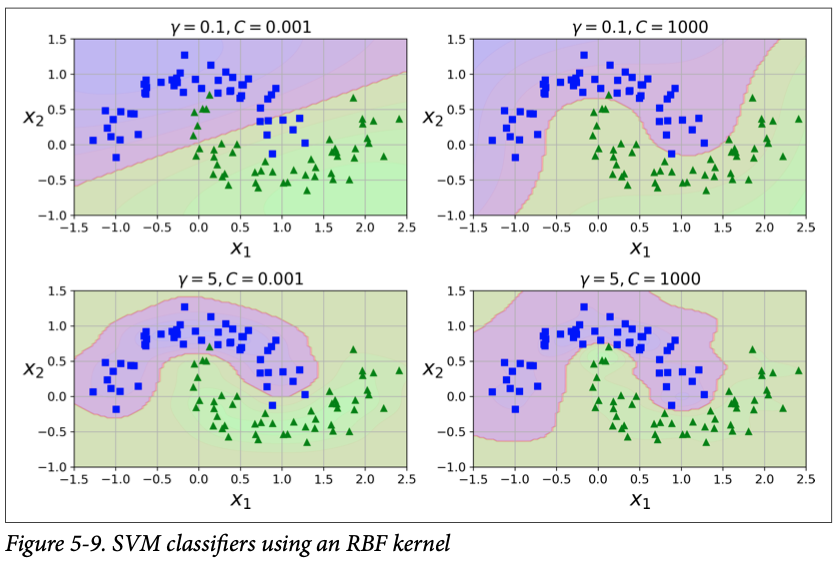
</div>

🔥 **Gamma**:

It acts as a regularisation parameter:
- Reduce if model is overfitting
- Increase if underfitting

In [13]:
rbf_kernel_svm_clf = Pipeline([ 
                            ("scaler", StandardScaler()),
                            ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001)) ])

rbf_kernel_svm_clf.fit(X, y)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', SVC(C=0.001, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=5, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])